# Title: **DEMAND FORECASTING IN PRODUCT SALES USING MACHINE LEARNING TECHNIQUES**

## **Abstract**

In supply chain management, demand forecasting is essential for optimizing various aspects of the supply chain, from procurement and production to distribution and inventory management. With the rise of machine learning as a subfield of AI, demand forecasting has become more efficient and completes tasks in less time. While AI includes various approaches, machine learning specifically involves developing algorithms that can learn and adapt from data. However, the level of satisfaction in obtaining accurate demand forecast values has not yet reached the retail industry’s needs.  This project, "Demand Forecasting in Product Sales using Machine Learning Techniques," addresses the challenge of selecting the most effective machine learning techniques and utilizing relevant features in building forecasting model with highest prediction accuracy. The study aims to design a comprehensive framework for applying machine learning to demand forecasting, including data preparation and preprocessing, features selection, identifying algorithms, and initial testing. It also seeks to develop, fine-tune, and validate machine learning models—specifically Random Forest (RF), Extreme Gradient Boosting (XGBoost), Artificial Neural Network (ANN), Support Vector Machines (SVM), and Long Short-Term Memory (LSTM)—using the Superstore Sales EU dataset. These models' performance will be thoroughly evaluated using Root Mean Squared Error (RMSE), Mean Squared Error (MSE), and Mean Absolute Error (MAE). The expected outcome is to predict future sales for the top high-volume products based on historical sales data and provide retail businesses with guidelines for selecting accurate and efficient predictive analytics tools for supply chain management.

*Keywords: Demand forecasting, machine learning, retail industry, inventory optimization, supply chain management, predictive analytics, model evaluation, performance metrics, historical sales data.*

## **Data Collection**

In [1]:
import pandas as pd

# Load the datasets
order_table = pd.read_csv("C:/Users/HS/Downloads/FYP_Datasets/Book1.csv")
return_table = pd.read_csv("C:/Users/HS/Downloads/FYP_Datasets/Book2.csv")
people_table = pd.read_csv("C:/Users/HS/Downloads/FYP_Datasets/Book3.csv")

# Merge order_df and return_df on 'Order ID'
merged_df = pd.merge(order_table, return_table, on='Order ID', how='left')

# Merge the resulting dataframe with people_df on 'Region'
superstore_df = pd.merge(merged_df, people_table, on='Region', how='left')

# Export the new dataset to a CSV file
superstore_df.to_csv("C:/Users/HS/Downloads/FYP_Datasets/Superstore Europe.csv", index=False)

## **Exploratory Data Analysis**

### **Introduction**
Exploratory Data Analysis (EDA) plays a pivotal role in uncovering meaningful insights from the "Superstore Sales EU" dataset, sourced from data.world and curated by Andy Kriebel. This dataset, comprising three primary tables—Order, Returns, and People—offers a comprehensive view into the dynamics of a European retail chain. With 10,000 records in the Order table alone, spanning 20 columns capturing transactional details, customer behaviors, and operational metrics, the dataset provides a rich foundation for understanding sales patterns, profitability drivers, and customer preferences.

In the realm of demand forecasting, the accuracy and reliability of predictions hinge on thorough data exploration and analysis. The "Superstore Sales EU" dataset equips analysts with crucial variables such as order dates, shipment details, sales volumes, discounts applied, and profitability margins. These insights are indispensable for identifying seasonal trends, evaluating the impact of returns on sales performance, and optimizing inventory management strategies. By conducting comprehensive EDA, we aim to uncover correlations, patterns, and outliers that will inform the development of robust forecasting models tailored to the dynamics of the European retail market.

This chapter begins by introducing the "Superstore Sales EU" dataset and its constituent tables, emphasizing their relevance and utility for demand forecasting. We delve into the initial steps of data cleaning and preprocessing, ensuring data integrity and preparing it for analysis. Feature selection and extraction techniques are explored to identify key variables influencing demand. Strategies for handling missing values and outliers are addressed to mitigate their impact on subsequent analyses. Additionally, the chapter highlights the significance of feature engineering in enhancing model performance and understanding complex relationships within the dataset. Finally, summary statistics, correlation analyses, and insights derived from EDA provide a foundation for building accurate demand forecasting models, culminating in actionable recommendations for stakeholders in the retail sector.

### **Dataset Preparation**
Understand the whole structure of the dataset before start to cleaning and preprocessing the dataset.

**Analyze the structure of dataset**

In [2]:
import pandas as pd

# Load the dataset
file_path = "C:/Users/HS/Downloads/FYP_Datasets/Superstore Europe.csv"
df = pd.read_csv(file_path)

# Display dataset's information and summary statistics
print("Data Content Preview:\n",df.head(5))
print("\nStructure of Dataset:\n")
print(df.info())
print("\nSummary Statistics:\n", df.describe(include='all'))

Data Content Preview:
    Row ID         Order ID Order Date Dispatch Date   Delivery Mode  \
0       1  ES-2023-1311038   7/2/2023     11/2/2023  Standard Class   
1       2  ES-2023-1311038   7/2/2023     11/2/2023  Standard Class   
2       3  ES-2023-1311038   7/2/2023     11/2/2023  Standard Class   
3       4  ES-2023-1311038   7/2/2023     11/2/2023  Standard Class   
4       5  ES-2023-1311038   7/2/2023     11/2/2023  Standard Class   

  Customer ID   Customer Name    Segment   City State/Province  ...  \
0    AS-10045  Aaron Smayling  Corporate  Leeds        England  ...   
1    AS-10045  Aaron Smayling  Corporate  Leeds        England  ...   
2    AS-10045  Aaron Smayling  Corporate  Leeds        England  ...   
3    AS-10045  Aaron Smayling  Corporate  Leeds        England  ...   
4    AS-10045  Aaron Smayling  Corporate  Leeds        England  ...   

        Product ID         Category Sub-Category  \
0  OFF-ST-10000988  Office Supplies      Storage   
1  TEC-AC-10004144 

**Dataset Overview**

The Sample_EU Superstore dataset contains 11,588 rows and 22 columns, covering various details such as orders, customer information, products, staffs, and sales metrics. Below is a summary of the key findings:

**Data Composition**

Columns: The dataset includes details such as Order ID, Order Date, Dispatch Date, Delivery Mode, Customer Name, Segment, City, State/Province, Country/Region, Product ID, Category, Sales, Quantity, Discount, Profit, Returned and People.

**Data Types**
- Numeric: 5 columns (Row ID, Sales, Quantity, Discount, Profit)
- Categorical/Text: 17 columns (Order ID, Order Date, Dispatch Date, Delivery Mode, Customer Name, City, ... People)

**Key Metrics**

1. Sales: The average sales amount is approximately 294.85, with a minimum of 2.96 and a maximum of 7958.58.
2. Profit: The average profit is 38.29, ranging from a loss of -3059.82 to a profit of 3979.08.
3. Discount: Most discounts are concentrated around 0.10 (mean), with a maximum of 0.85.
4. Quantity: Orders range from 1 to 14 items, with an average of about 3.79.

**General Observations**

The dataset contains no missing values, ensuring complete data integrity. The most frequent delivery mode is "Standard Class," appearing in 60.61% of orders. The Customer Name and Product Name columns are diverse, with 795 unique customer names and 1856 unique product names.

**Summary Statistics**

The Sales and Profit distributions indicate variability, with some high-value outliers. The dataset includes 3 main categories (Office Supplies, Technology, Furniture), with "Office Supplies" being the most frequent.

**Distribution of All Columns**

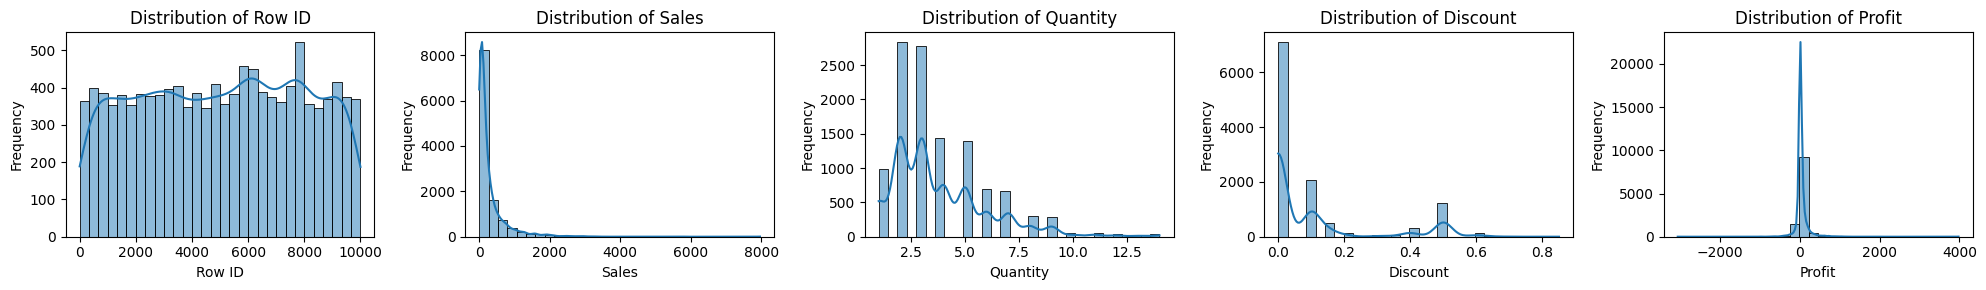

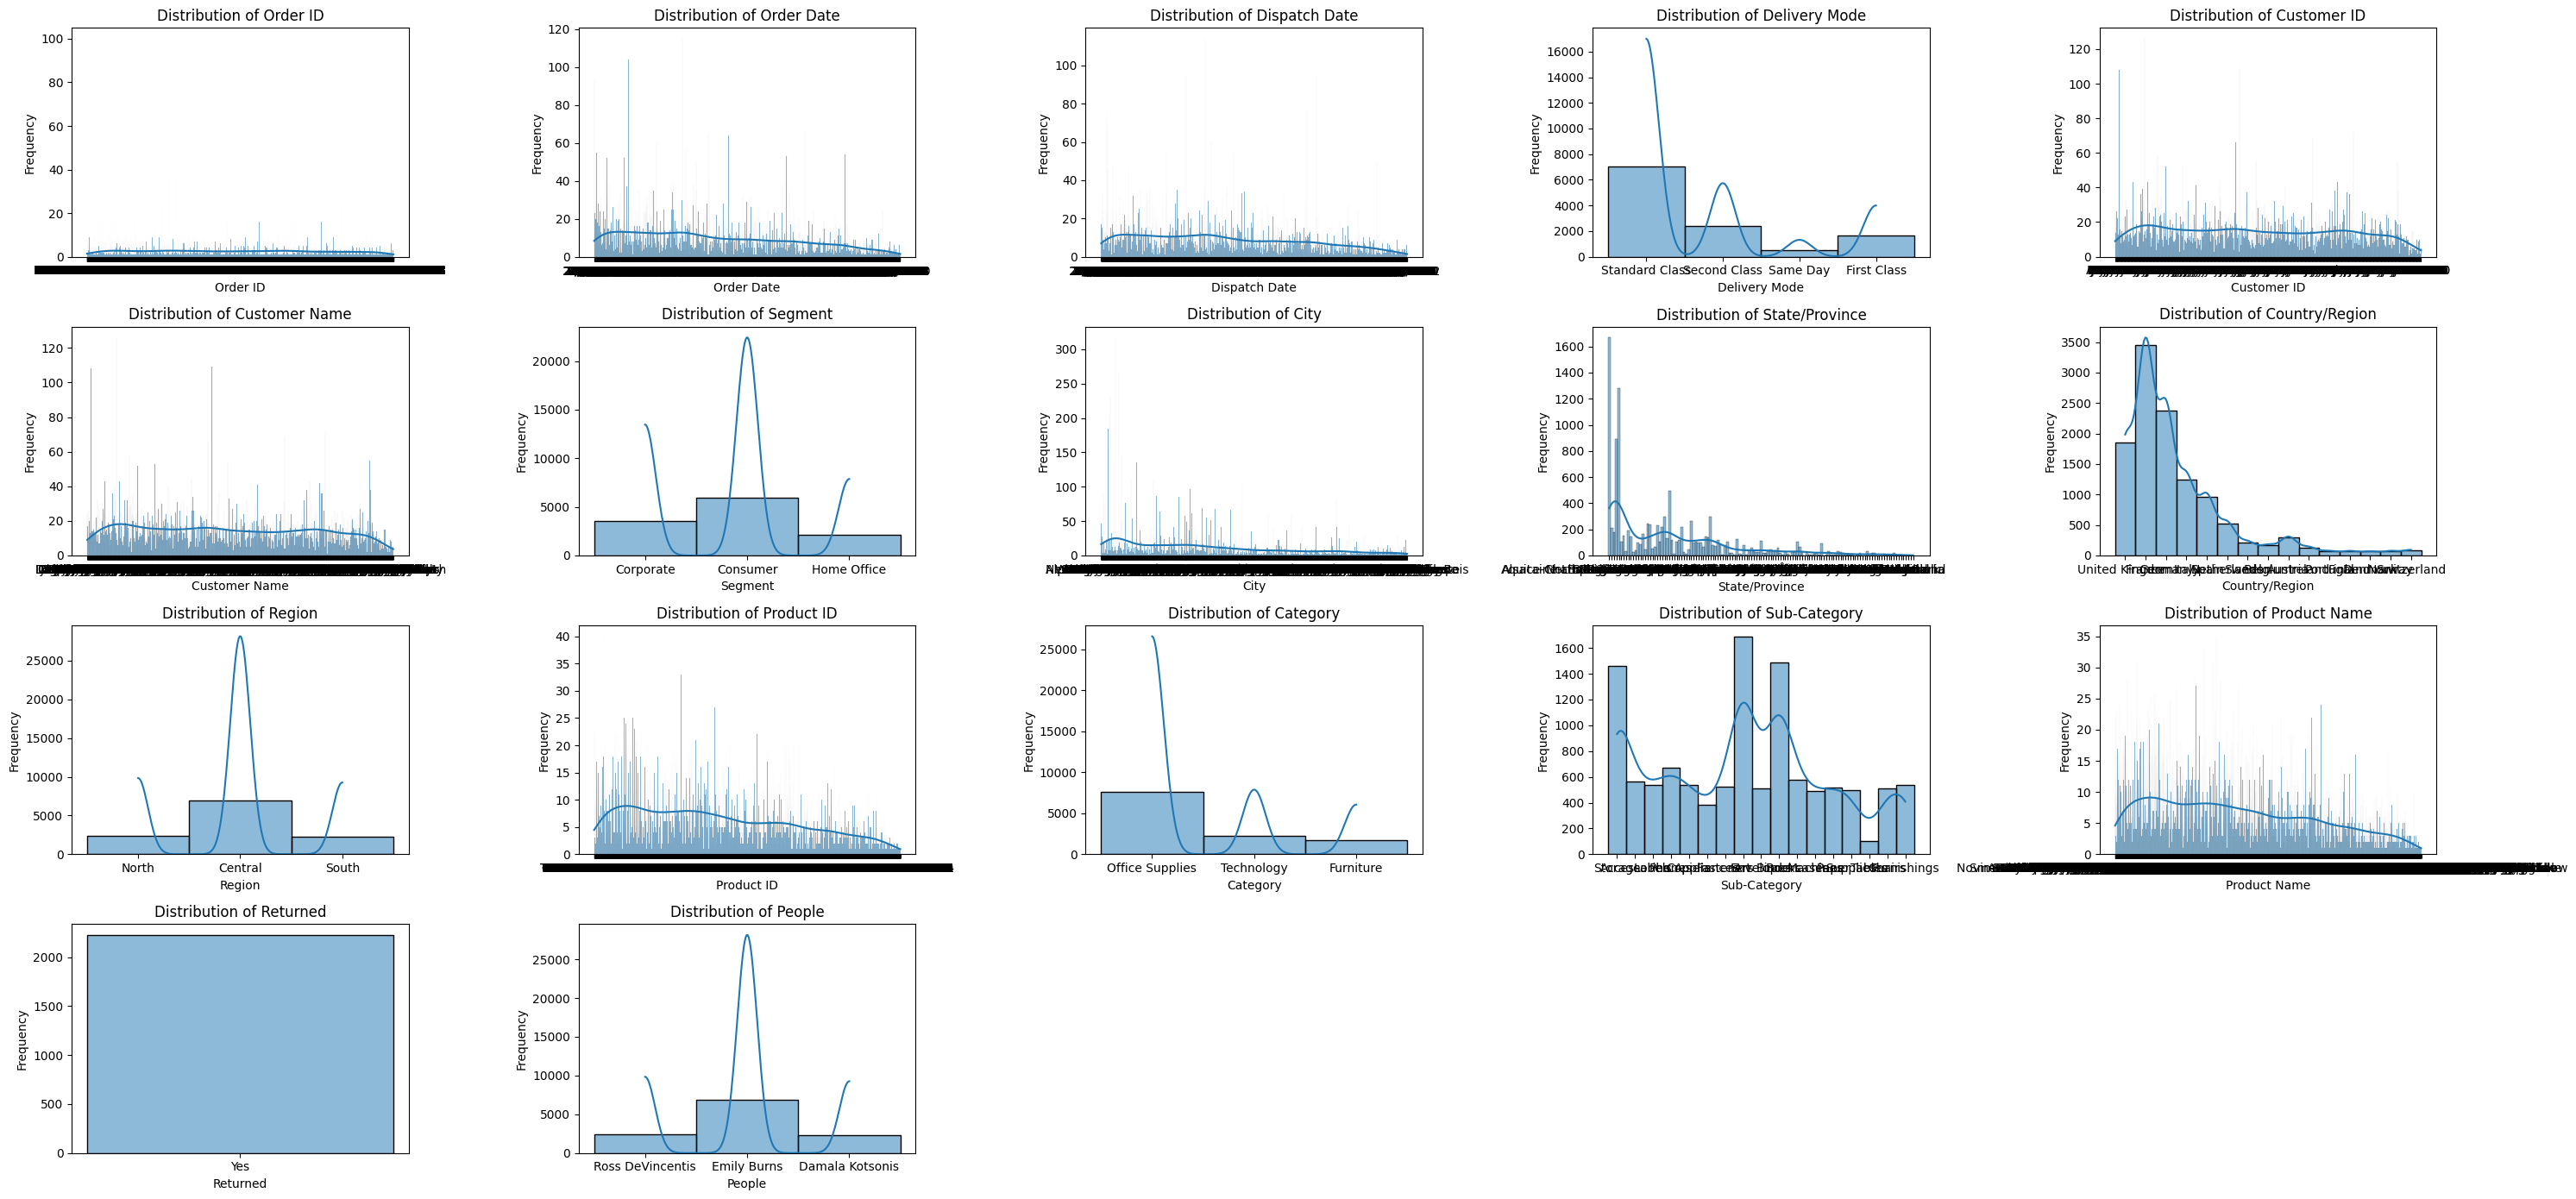

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(20, 3))
for i, col in enumerate(num_cols, 1):
    plt.subplot(1, 5, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

# Plot distribution of categorical columns
cat_cols = df.select_dtypes(include=['object']).columns
plt.figure(figsize=(30, 14))
for i, col in enumerate(cat_cols, 1):
    plt.subplot(4, 5, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.subplots_adjust(wspace=0.4, hspace=0.6)
plt.tight_layout()
plt.show()

- **Row ID:** Shows the frequency distribution of Row IDs ranging from 0 to 10,000. Frequency is relatively uniform, with slight variations. Highest frequency around 500 and lowest around 200.

- **Sales:** Frequency distribution of Sales values. Majority of sales values concentrated at the lower end, with a steep decline as the sales value increases. Sales values range from 0 to 8,000, with the highest frequency around 8,000.

- **Quantity:** Frequency distribution of Quantity values. Right-skewed distribution, with most quantities being small. Quantity values range from 0 to 12.5, with the highest frequency around 2.5.

- **Discount:** Frequency distribution of Discount values. Several peaks indicate multiple common discount values. Discount values range from 0 to 0.8, with the highest frequency around 0.0.

- **Profit:** Frequency distribution of Profit values. Centered around 0, with a sharp peak and steep decline on both sides. Profit values range from -2,000 to 4,000, with the highest frequency around 0.

- **Order ID:** Shows the frequency of different order IDs. The distribution appears to be relatively uniform with no significant peaks.

- **Order Date:** Shows the frequency of orders over different dates. There are several peaks indicating higher frequencies on certain dates.

- **Dispatch Date:** Shows the frequency of dispatch dates. Similar to the order date, there are several peaks indicating higher frequencies on certain dates.

- **Delivery Mode:** Shows the frequency of different delivery modes. The modes include Standard Class, Second Class, Same Day, and First Class, with Standard Class being the most frequent.

- **Customer ID:** Shows the frequency of different customer IDs. The distribution appears to be relatively uniform with no significant peaks.

- **Customer Name:** Shows the frequency of different customer names. The distribution appears to be relatively uniform with no significant peaks.

- **Segment:** Shows the frequency of different customer segments. The segments include Corporate, Consumer, and Home Office, with Consumer being the most frequent.

- **City:** Shows the frequency of orders from different cities. There are several peaks indicating higher frequencies in certain cities.

- **State/Province:** Shows the frequency of orders from different states or provinces. There are several peaks indicating higher frequencies in certain states or provinces.

- **Country/Region:** Shows the frequency of orders from different countries or regions. The United States has the highest frequency, followed by other countries.

- **Region:** Shows the frequency of orders from different regions. The regions include North, Central, and South, with Central being the most frequent.

- **Product ID:** Shows the frequency of different product IDs. The distribution appears to be relatively uniform with no significant peaks.

- **Category:** Shows the frequency of different product categories. The categories include Office Supplies, Technology, and Furniture, with Office Supplies being the most frequent.

- **Sub-Category:** Shows the frequency of different product sub-categories. There are several peaks indicating higher frequencies in certain sub-categories.

- **Product Name:** Shows the frequency of different product names. The distribution appears to be relatively uniform with no significant peaks.

- **Returned:** Shows the frequency of returned orders. All orders appear to be returned.

- **People:** Shows the frequency of orders associated with different people. The names include Ross DeVincentis, Emily Burns, and Damala Kotsonis, with Emily Burns being the most frequent.

**Correlation Matrix**

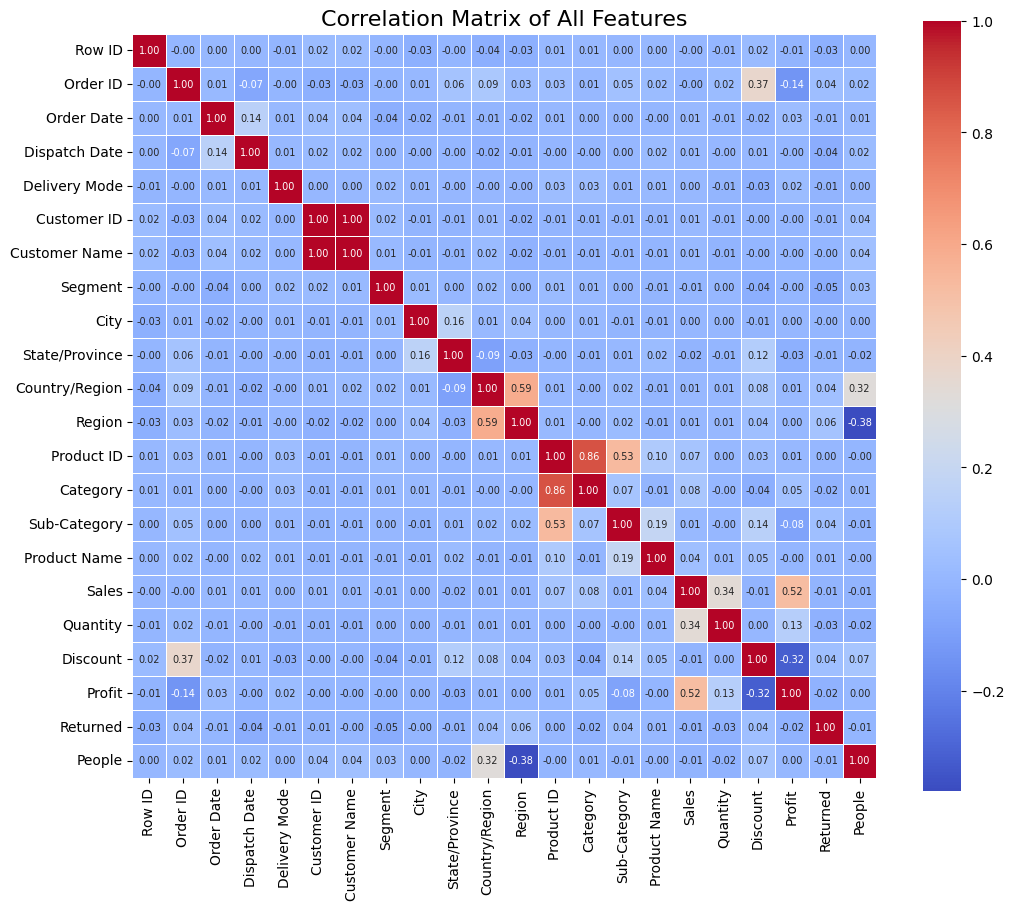

In [4]:
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

corr_mtrx = df.copy()

# Dictionary to store encoders
labels = {}

# Encode and replace for text columns
for cols in cat_cols:
    le = LabelEncoder()
    corr_mtrx[cols] = le.fit_transform(corr_mtrx[cols])
    labels[cols] = le

plt.figure(figsize=(12, 10))
sns.heatmap(corr_mtrx.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5, annot_kws={"size": 7})
plt.title('Correlation Matrix of All Features', fontsize=16)
plt.show()

- Product ID and Category have a high positive correlation of 0.86.
- Region and Country/Region have a high positive correlation of 0.59.
- Discount and Order ID have a moderate positive correlation of 0.37.
- Profit and Sales have a moderate positive correlation of 0.34.
- Quantity and Sales have a moderate positive correlation of 0.34.
- Returned and People have a perfect positive correlation of 1.00, indicating they are likely the same feature or perfectly related.
- Region and People have a moderate negative correlation of -0.38.

**Visualizing Graph of Sales Vs Time**

See if there are anomalies in plotting the graph of sales vs time. Initially, the 'Order Date' needed to convert in datetime format.

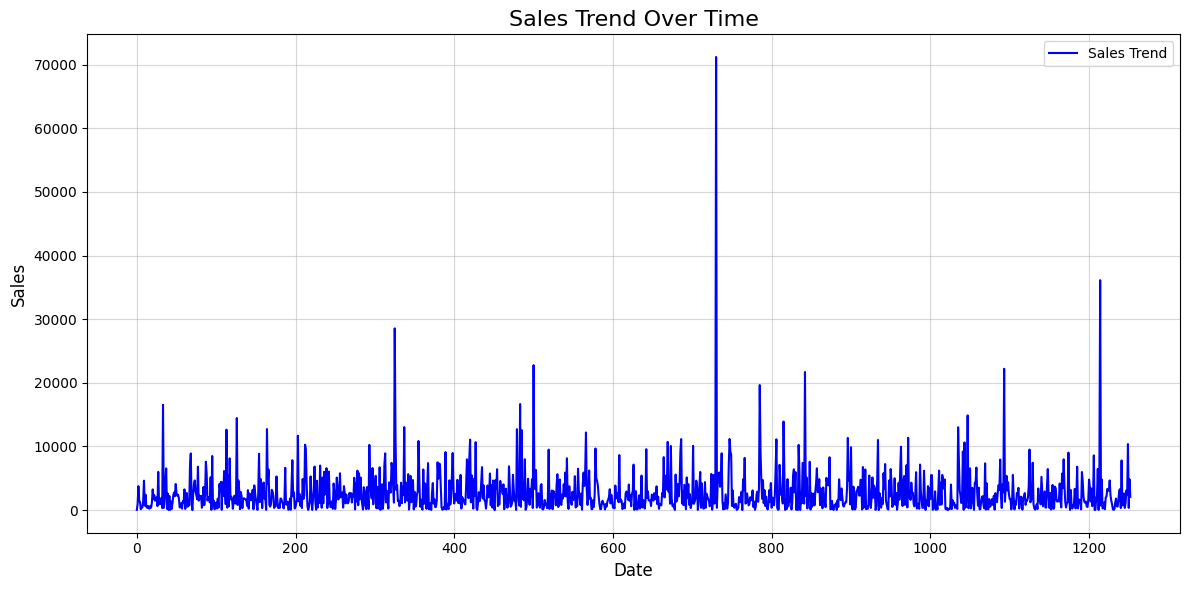

In [5]:
import matplotlib.pyplot as plt

# Group sales by order date and sum
sales_trend = corr_mtrx.groupby('Order Date')['Sales'].sum()

# Plot the sales trend
plt.figure(figsize=(12, 6))
plt.plot(sales_trend, label='Sales Trend', color='blue')
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid(alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

- The graph shows several noticeable spikes in sales, indicating periods of increased sales activity.
- The most significant spike occurs around the 700 mark on the x-axis, where sales reach approximately 70,000.
- There are other smaller spikes throughout the graph, showing variability in sales.
- The overall trend displays high variability with occasional peaks, suggesting fluctuating sales patterns over the observed period.

## **Preprocessing Data**

**Import neccessary libraries**

This code imports four essential libraries for data analysis and visualization in Python. 

pandas is used for data manipulation, matplotlib.pyplot for plotting, numpy for numerical operations, and seaborn for statistical data visualization.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

**Define data types and format for the columns**

- **Object type:** Columns such as Row ID, Order ID, Customer Name, and Product Name will be treated as categorical or string data.
- **Datetime format:** Order Date and Dispatch Date will be converted to datetime format for time-based analysis.
- **Numeric types:** Columns like Sales, Discount, Profit, and Quantity are correctly set as float64 or int64.

In [7]:
file_path = 'C:/Users/HS/Downloads/FYP_Datasets/Superstore Europe.csv'
df = pd.read_csv(file_path)

# Copy for preprocessing dataset
prep_data = df.copy()

# Define the columns
prep_data = prep_data.astype({
    'Row ID' : 'object',
    'Order ID': 'object',
    'Customer ID': 'object',
    'Product ID': 'object',
    'Customer Name': 'object',
    'City': 'object',
    'Product Name': 'object',
    'Delivery Mode': 'object',
    'Segment': 'object',
    'State/Province': 'object',
    'Sub-Category': 'object',
    'Category': 'object',
    'Region': 'object',
    'Country/Region': 'object',
    'Sales': 'float',
    'Discount': 'float',
    'Profit': 'float',
    'Quantity': 'int',
    'Returned': 'object',
    'People': 'object'
})

# Convert 'Order Date' and 'Dispatch Date' to datetime format
prep_data['Order Date'] = pd.to_datetime(prep_data['Order Date'], format='%d/%m/%Y')
prep_data['Dispatch Date'] = pd.to_datetime(prep_data['Dispatch Date'], format='%d/%m/%Y')
prep_data = prep_data.sort_values('Order Date')

**Data Cleaning:** Rename column 'People', Replace missing value, Remove duplicate entries

In [8]:
# Rename column 'People' to 'Staff Name'
prep_data = prep_data.rename(columns={'People': 'Staff Name'})

# Replace NaN with 'No' in 'Returned' column
prep_data['Returned'] = prep_data['Returned'].fillna('No')

# Remove duplicate entries
prep_data = prep_data.drop_duplicates()

# Create a copy for readable dataset
data = prep_data.copy()

**Encode categorical columns**

Next, perform label encoding on specific columns and renames some columns to create key identification. Label encoding converts categorical text data into numerical data, which is necessary for many machine learning algorithms that require numerical input.

In [9]:
from sklearn.preprocessing import LabelEncoder

id_col = ['Row ID', 'Order ID', 'Customer ID', 'Product ID']
name_col = ['Customer Name', 'Product Name', 'City', 'Staff Name']
cat_col = ['Delivery Mode', 'Segment', 'State/Province', 'Country/Region', 'Region', 
           'Sub-Category', 'Category', 'Returned']
encode_col = id_col + name_col + cat_col

labels = {}
for col in encode_col:
    le = LabelEncoder()
    prep_data[col] = le.fit_transform(prep_data[col])
    labels[col] = le

# Key columns for customer, product, location and staff
prep_data = prep_data.rename(columns={
    'Customer Name': 'Customer Key',
    'Product Name': 'Product Key',
    'City': 'Location Key',
    'Staff Name': 'Staff Key'
})

**Normalize and standardize numerical features**

MinMaxScaler scales the data to a specified range, typically between 0 and 1, which is useful for algorithms that require bounded input features.

In [10]:
from sklearn.preprocessing import MinMaxScaler

num_col = ['Sales', 'Quantity', 'Discount', 'Profit']

# Min-Max scaling
min_max_scaler = MinMaxScaler()
prep_data[num_col] = min_max_scaler.fit_transform(prep_data[num_col])

prep_data = prep_data.drop(id_col, axis=1)

**Identify and removing outliers**

Outliers are data points that differ significantly from other observations. They can skew and mislead the training of machine learning models.

*IQR Method:*

IQR (Interquartile Range): The range between the first quartile (Q1) and the third quartile (Q3).

Outliers: Data points below Q1 - 1.5*IQR or above Q3 + 1.5*IQR are considered outliers.

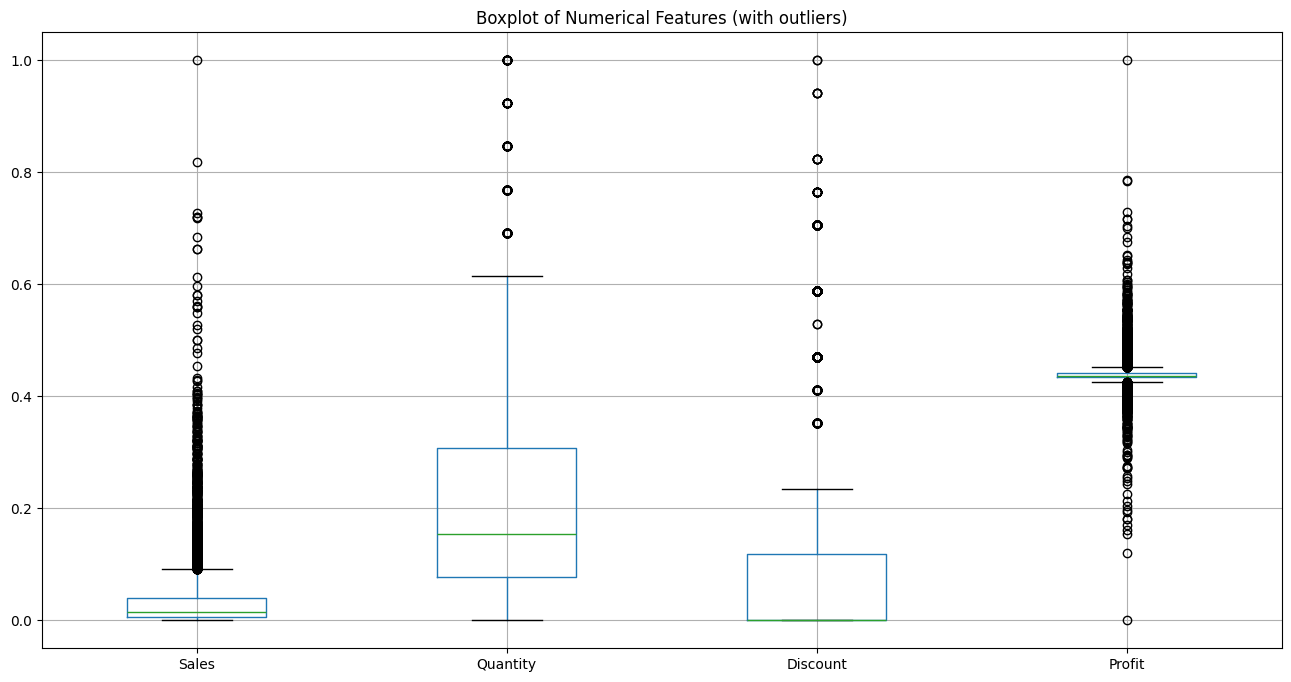

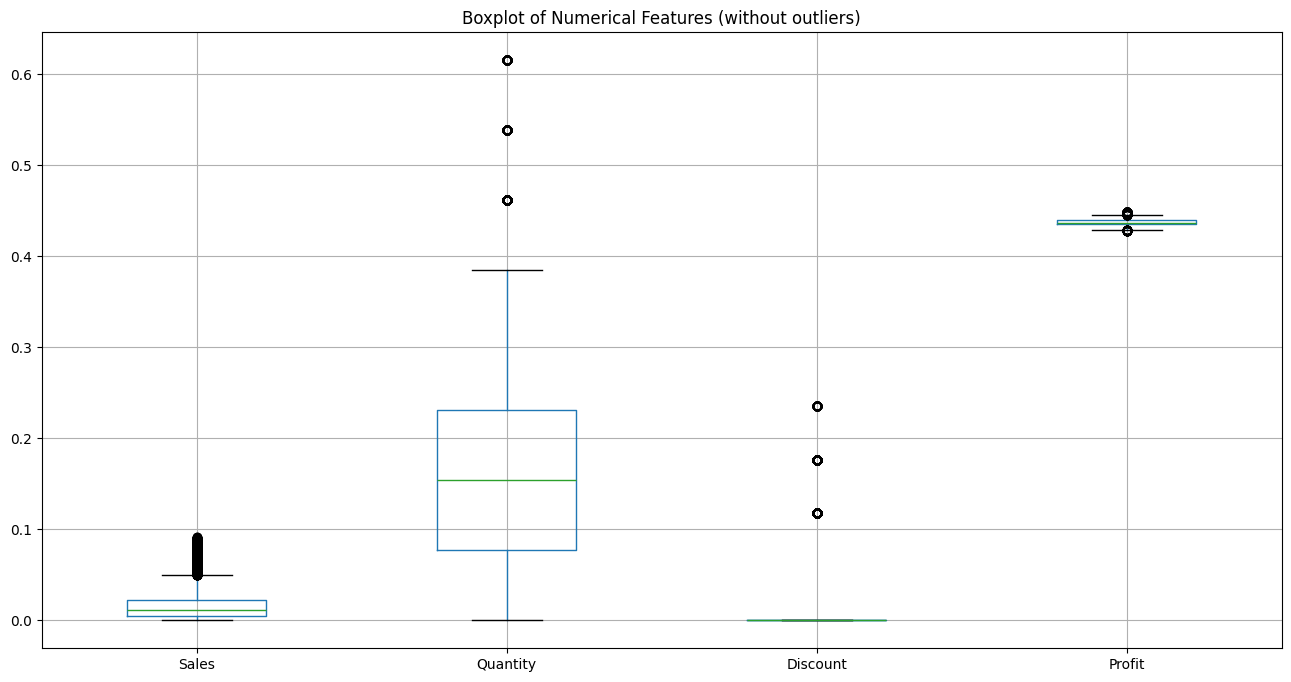

In [11]:
# Visualize the outliers
plt.figure(figsize=(16, 8))
prep_data[num_col].boxplot()
plt.title('Boxplot of Numerical Features (with outliers)')
plt.show()

# Remove outliers using IQR method
def iqr(prep_data, data, column):
    Q1 = prep_data[column].quantile(0.25)
    Q3 = prep_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply boundaries to both datasets
    prep_data_filtered = prep_data[(prep_data[column] >= lower_bound) & (prep_data[column] <= upper_bound)]
    data_filtered = data[(prep_data[column] >= lower_bound) & (prep_data[column] <= upper_bound)]
    
    return prep_data_filtered, data_filtered

for col in num_col:
    prep_data, data = iqr(prep_data, data, col)

# Visualize the data without outliers
plt.figure(figsize=(16, 8))
prep_data[num_col].boxplot()
plt.title('Boxplot of Numerical Features (without outliers)')
plt.show()

- **Sales:**

Before removing outliers, the boxplot for Sales reveals a significant number of outliers above the upper whisker, indicating unusually high values. The interquartile range (IQR) is small, suggesting that most data points are closely clustered together. The median, represented by the green line, is positioned very close to the lower quartile, implying a right-skewed distribution. After removing outliers, the boxplot for Sales shows a very compact distribution with the median positioned close to zero. The IQR remains small, indicating that most data points are still clustered near the median, and there are no visible outliers in the Sales feature.

- **Quantity:**

Before removing outliers, the boxplot for Quantity shows fewer outliers compared to Sales, indicating less extreme variability. The interquartile range (IQR) is larger, reflecting a wider spread of data points. The median is positioned closer to the center of the IQR, suggesting a more symmetric distribution. After removing outliers, the boxplot for Quantity still shows a larger IQR compared to Sales, indicating greater variability in the data. The median is positioned around 0.2, and there are several outliers above the upper whisker, suggesting the presence of some higher values that are not typical for the rest of the data.

- **Discount:**

Before removing outliers, the boxplot for Discount reveals several outliers above the upper whisker, indicating the presence of unusually high values. The interquartile range (IQR) is relatively small, suggesting that most data points are closely clustered together. The median is positioned at the lower quartile, implying a right-skewed distribution. After removing outliers, the boxplot for Discount shows a very narrow IQR, indicating that most data points are clustered very close to the median, which is near zero. There are still a few outliers above the upper whisker, suggesting the presence of some higher discount values that are not typical for the rest of the data.

- **Profit:**

Before removing outliers, the boxplot for Profit indicates a large number of outliers above the upper whisker, highlighting the presence of unusually high values. The interquartile range (IQR) is small, suggesting that most data points are closely clustered together. The median is positioned very close to the upper quartile, implying a left-skewed distribution. After removing outliers, the boxplot for Profit displays a very narrow IQR, similar to Discount, indicating that most data points are clustered closely around the median, which is approximately 0.4. After the removal of outliers, there are no visible outliers in the Profit feature.


**Feature engineering: Time features, rolling statistics, exponential smoothing, autocorrelation, and lag features**

- Function to extracts the month, year, day of the week, and quarter from the 'Order Date' column. 
- Function that calculates rolling mean and standard deviation for the 'Sales' column over a specified window. 
- Function that applies exponential weighted moving average (EWMA) smoothing to the 'Sales' column. 
- Function to create lagged versions of the 'Sales' column for specified lag periods.

Finally, any missing values generated by these transformations are filled with zeros.

In [12]:
# Time Features
def add_time_features(df, date_col):
    df['Month'] = df[date_col].dt.month
    df['Year'] = df[date_col].dt.year
    df['Dayofweek'] = df[date_col].dt.dayofweek
    df['Quarterofyear'] = df[date_col].dt.quarter
    return df

prep_data = add_time_features(prep_data, 'Order Date')
data = add_time_features(data, 'Order Date')

# Add column 'Day Type'
prep_data['Day Type'] = prep_data['Dayofweek'].apply(lambda x: 1 if x < 5 else 0)
data['Day Type'] = data['Dayofweek'].apply(lambda x: 'Weekday' if x < 5 else 'Weekend')

# Add column 'Dispatch Delay'
prep_data['Dispatch Delay'] = (prep_data['Dispatch Date'] - prep_data['Order Date']).dt.days
data['Dispatch Delay'] = (data['Dispatch Date'] - data['Order Date']).dt.days

# Rolling statistics
def add_rolling(df, col, window=3):
    df[f'{col}_rolling_mean'] = df[col].rolling(window=window).mean()
    df[f'{col}_rolling_std'] = df[col].rolling(window=window).std()
    return df

prep_data = add_rolling(prep_data, 'Sales', window=3)
data = add_rolling(data, 'Sales', window=3)

# Exponential smoothing
def add_smoothing(df, col, span=3):
    df[f'{col}_ewma'] = df[col].ewm(span=span, adjust=False).mean()
    return df

prep_data = add_smoothing(prep_data, 'Sales', span=3)
data = add_smoothing(data, 'Sales', span=3)

# Autocorrelation and lag features
def add_lag(df, col, lags):
    for lag in lags:
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)
    return df

prep_data = add_lag(prep_data, 'Sales', lags=[1, 2, 3])
data = add_lag(data, 'Sales', lags=[1, 2, 3])

# Replace missing values with '0'
prep_data = prep_data.fillna(0)
data = data.fillna(0)

**Time Features:**

- Month: Extracts the month from the 'Order Date' column.
- Year: Extracts the year from the 'Order Date' column.
- Dayofweek: Extracts the day of the week from the 'Order Date' column (0 = Monday, 6 = Sunday).
- Quarterofyear: Extracts the quarter of the year from the 'Order Date' column (1 to 4).

**Rolling Statistics:** Calculates the rolling mean of the 'Sales' column over a specified window (default is 3 periods). This helps to smooth out short-term fluctuations and highlight longer-term trends.
Sales_rolling_std: Calculates the rolling standard deviation of the 'Sales' column over the same window. This measures the variability of sales over the specified periods.

**Exponential Smoothing:** Applies exponential weighted moving average (EWMA) smoothing to the 'Sales' column with a specified span (default is 3 periods). This gives more weight to recent observations, making it useful for capturing trends while reducing noise.

**Leg Features:** Creates lagged versions of the 'Sales' column for the specified lag periods (1, 2, and 3 periods). These features capture the sales values from previous periods, which can be useful for modeling temporal dependencies.

**Day Type:** Categorizes days as weekdays (1) or weekends (0) in prep_data, and as 'Weekday' or 'Weekend' in data. This feature helps to distinguish between different types of days, which can have different patterns of sales or other metrics.

**Dispatch Delay:** Calculates the number of days between the 'Dispatch Date' and the 'Order Date'. This feature measures the time taken to dispatch an order, which can be important for understanding logistics and customer satisfaction.


**Cyclical Encoding for time features**

Cyclical encoding is useful for time-related features because it captures the cyclical nature of time (e.g., months, days of the week) in a way that linear encoding cannot. This helps machine learning models better understand and utilize these patterns.

In [13]:
# Function for cyclical encoding
def cyclical_encode(date_col, prefix):
    month = date_col.dt.month
    year = date_col.dt.year
    dayofweek = date_col.dt.dayofweek
    quarterofyear = date_col.dt.quarter
    
    month_sin = np.sin(2 * np.pi * month / 12)
    month_cos = np.cos(2 * np.pi * month / 12)
    year_sin = np.sin(2 * np.pi * (year - year.min()) / (year.max() - year.min()))
    year_cos = np.cos(2 * np.pi * (year - year.min()) / (year.max() - year.min()))
    dayofweek_sin = np.sin(2 * np.pi * dayofweek / 7)
    dayofweek_cos = np.cos(2 * np.pi * dayofweek / 7)
    quarterofyear_sin = np.sin(2 * np.pi * quarterofyear / 52)
    quarterofyear_cos = np.cos(2 * np.pi * quarterofyear / 52)
    
    return pd.DataFrame({
        f'{prefix}_month_sin': month_sin,
        f'{prefix}_month_cos': month_cos,
        f'{prefix}_year_sin': year_sin,
        f'{prefix}_year_cos': year_cos,
        f'{prefix}_dayofweek_sin': dayofweek_sin,
        f'{prefix}_dayofweek_cos': dayofweek_cos,
        f'{prefix}_quarterofyear_sin': quarterofyear_sin,
        f'{prefix}_quarterofyear_cos': quarterofyear_cos
    })

# Apply function to 'Order Date'
prep_data_encoded = cyclical_encode(prep_data['Order Date'], 'order')
prep_data = pd.concat([prep_data, prep_data_encoded], axis=1)

**Mapping time features**

These mappings enhance the readability of the data by converting numerical representations of months and days into their more intuitive and recognizable names. This will be useful for data visualization and reporting.

In [14]:
# Mapping the 'Month' column
month_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}

data['Month Name'] = data['Month'].map(month_map)

# Mapping the 'Dayofweek' column
dayofweek_map = {
    0: 'Monday',
    1: 'Tuesday',
    2: 'Wednesday',
    3: 'Thursday',
    4: 'Friday',
    5: 'Saturday',
    6: 'Sunday'
}

data['Dayofweek Name'] = data['Dayofweek'].map(dayofweek_map)

**Visualize the cyclical data**

Encoding cyclical features using sine and cosine transformations allow models to understand better and learn from the periodic patterns in the data. This can lead to improved performance in tasks such as forecasting, classification, and regression.

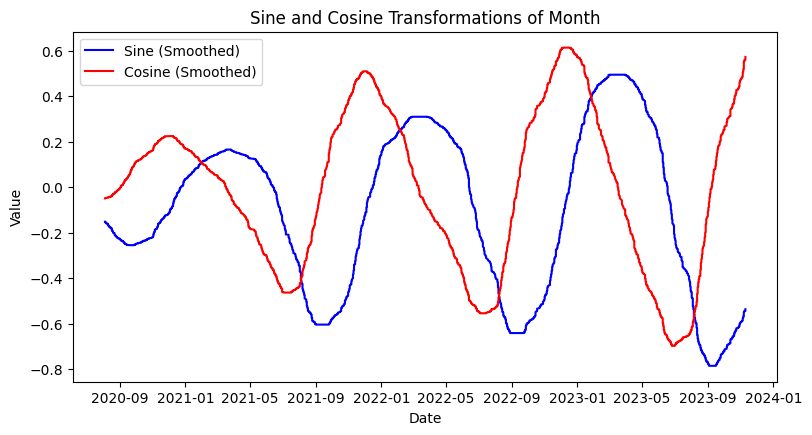

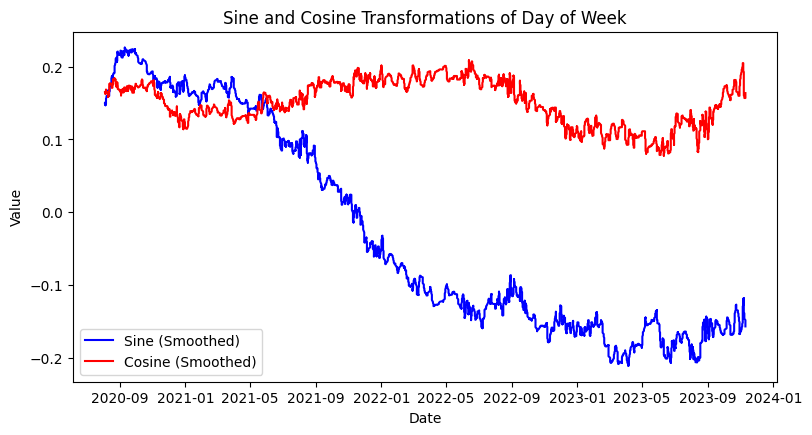

In [15]:
window = 1000
prep_data['mth_sin_smooth'] = prep_data['order_month_sin'].rolling(window=window, center=True).mean()
prep_data['mth_cos_smooth'] = prep_data['order_month_cos'].rolling(window=window, center=True).mean()
prep_data['DoW_sin_smooth'] = prep_data['order_dayofweek_sin'].rolling(window=window, center=True).mean()
prep_data['DoW_cos_smooth'] = prep_data['order_dayofweek_cos'].rolling(window=window, center=True).mean()

# Plot Smoothed Sine and Cosine Transformations of Month
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(prep_data['Order Date'], prep_data['mth_sin_smooth'], label='Sine (Smoothed)', color='blue')
plt.plot(prep_data['Order Date'], prep_data['mth_cos_smooth'], label='Cosine (Smoothed)', color='red')
plt.title("Sine and Cosine Transformations of Month")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Plot Smoothed Sine and Cosine Transformations of Day of Week
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 1)
plt.plot(prep_data['Order Date'], prep_data['DoW_sin_smooth'], label='Sine (Smoothed)', color='blue')
plt.plot(prep_data['Order Date'], prep_data['DoW_cos_smooth'], label='Cosine (Smoothed)', color='red')
plt.title("Sine and Cosine Transformations of Day of Week")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()

# Drop the smoothed columns. This is just for visualization purposes
smooth_col = ['mth_sin_smooth', 'mth_cos_smooth', 'DoW_sin_smooth', 'DoW_cos_smooth']
prep_data = prep_data.drop(smooth_col, axis=1)

**Cyclical data of Month:**

The trend shows periodic oscillations for both the sine and cosine transformations over time. The sine curve generally peaks around the middle of the year and reaches its lowest points at the beginning and end of the year. The cosine curve peaks at the beginning and end of the year and reaches its lowest points around the middle of the year.

**Cyclical data of Day of Week:**

The blue sine curve illustrates a noticeable cyclical pattern with a clear downward and upward trend. It starts around 0.2 in September 2020, decreases steadily to around -0.2 by mid-2022, and then gradually increases back towards 0 by January 2024.

The red cosine curve displays a more stable trend with minor fluctuations, adding another dimension to understanding the cyclical behavior. It starts around 0.2 in September 2020, remains relatively stable with minor fluctuations, and then slightly decreases towards 0 by January 2024.

**Plot the 2D Scatter plot for circular pattern**

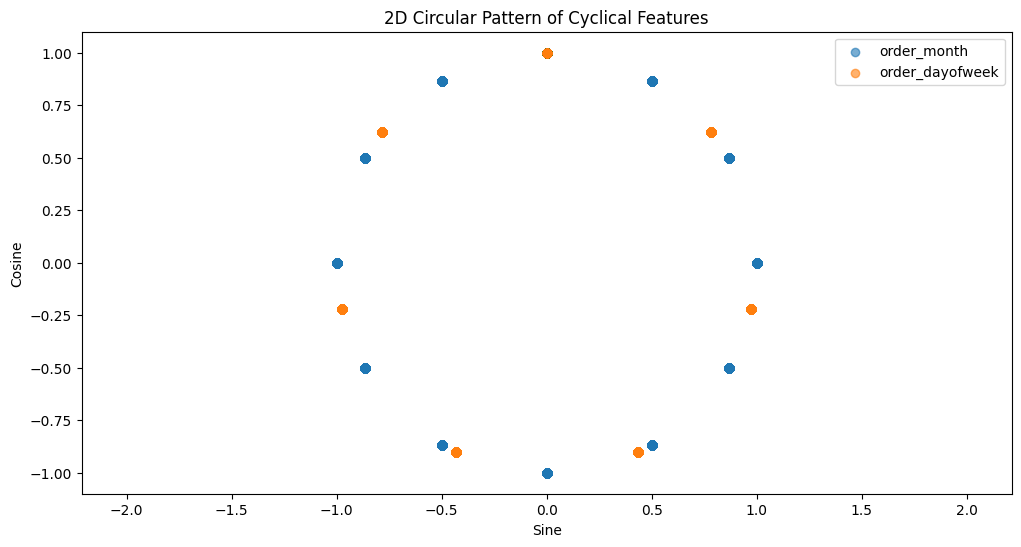

In [16]:
cyclical_col = ["order_month", "order_dayofweek"]

plt.figure(figsize=(12, 6))
for feature in cyclical_col:
    sin_col = f"{feature}_sin"
    cos_col = f"{feature}_cos"

    plt.scatter(prep_data[sin_col], prep_data[cos_col], alpha=0.6, label=feature)
plt.title("2D Circular Pattern of Cyclical Features")
plt.xlabel("Sine")
plt.ylabel("Cosine")
plt.axis('equal')
plt.legend()
plt.show()

Both features (months and days) exhibit a similar circular pattern, though the number of points differs due to the different lengths of the cycles (12 months vs. 7 days). This shows that cyclical transformations can be applied to various time-related features to understand their periodic behavior.

For Month, the nearly perfect circle with evenly spaced points suggests that each month has a distinct and recurring position in the cycle, which is crucial for understanding seasonality in data.

For Day of Week, the circular pattern with evenly spaced points indicates a similar periodicity for the days of the week, which can help in planning weekly trends and activities.

**Correlation Matrix of New Added Columns**

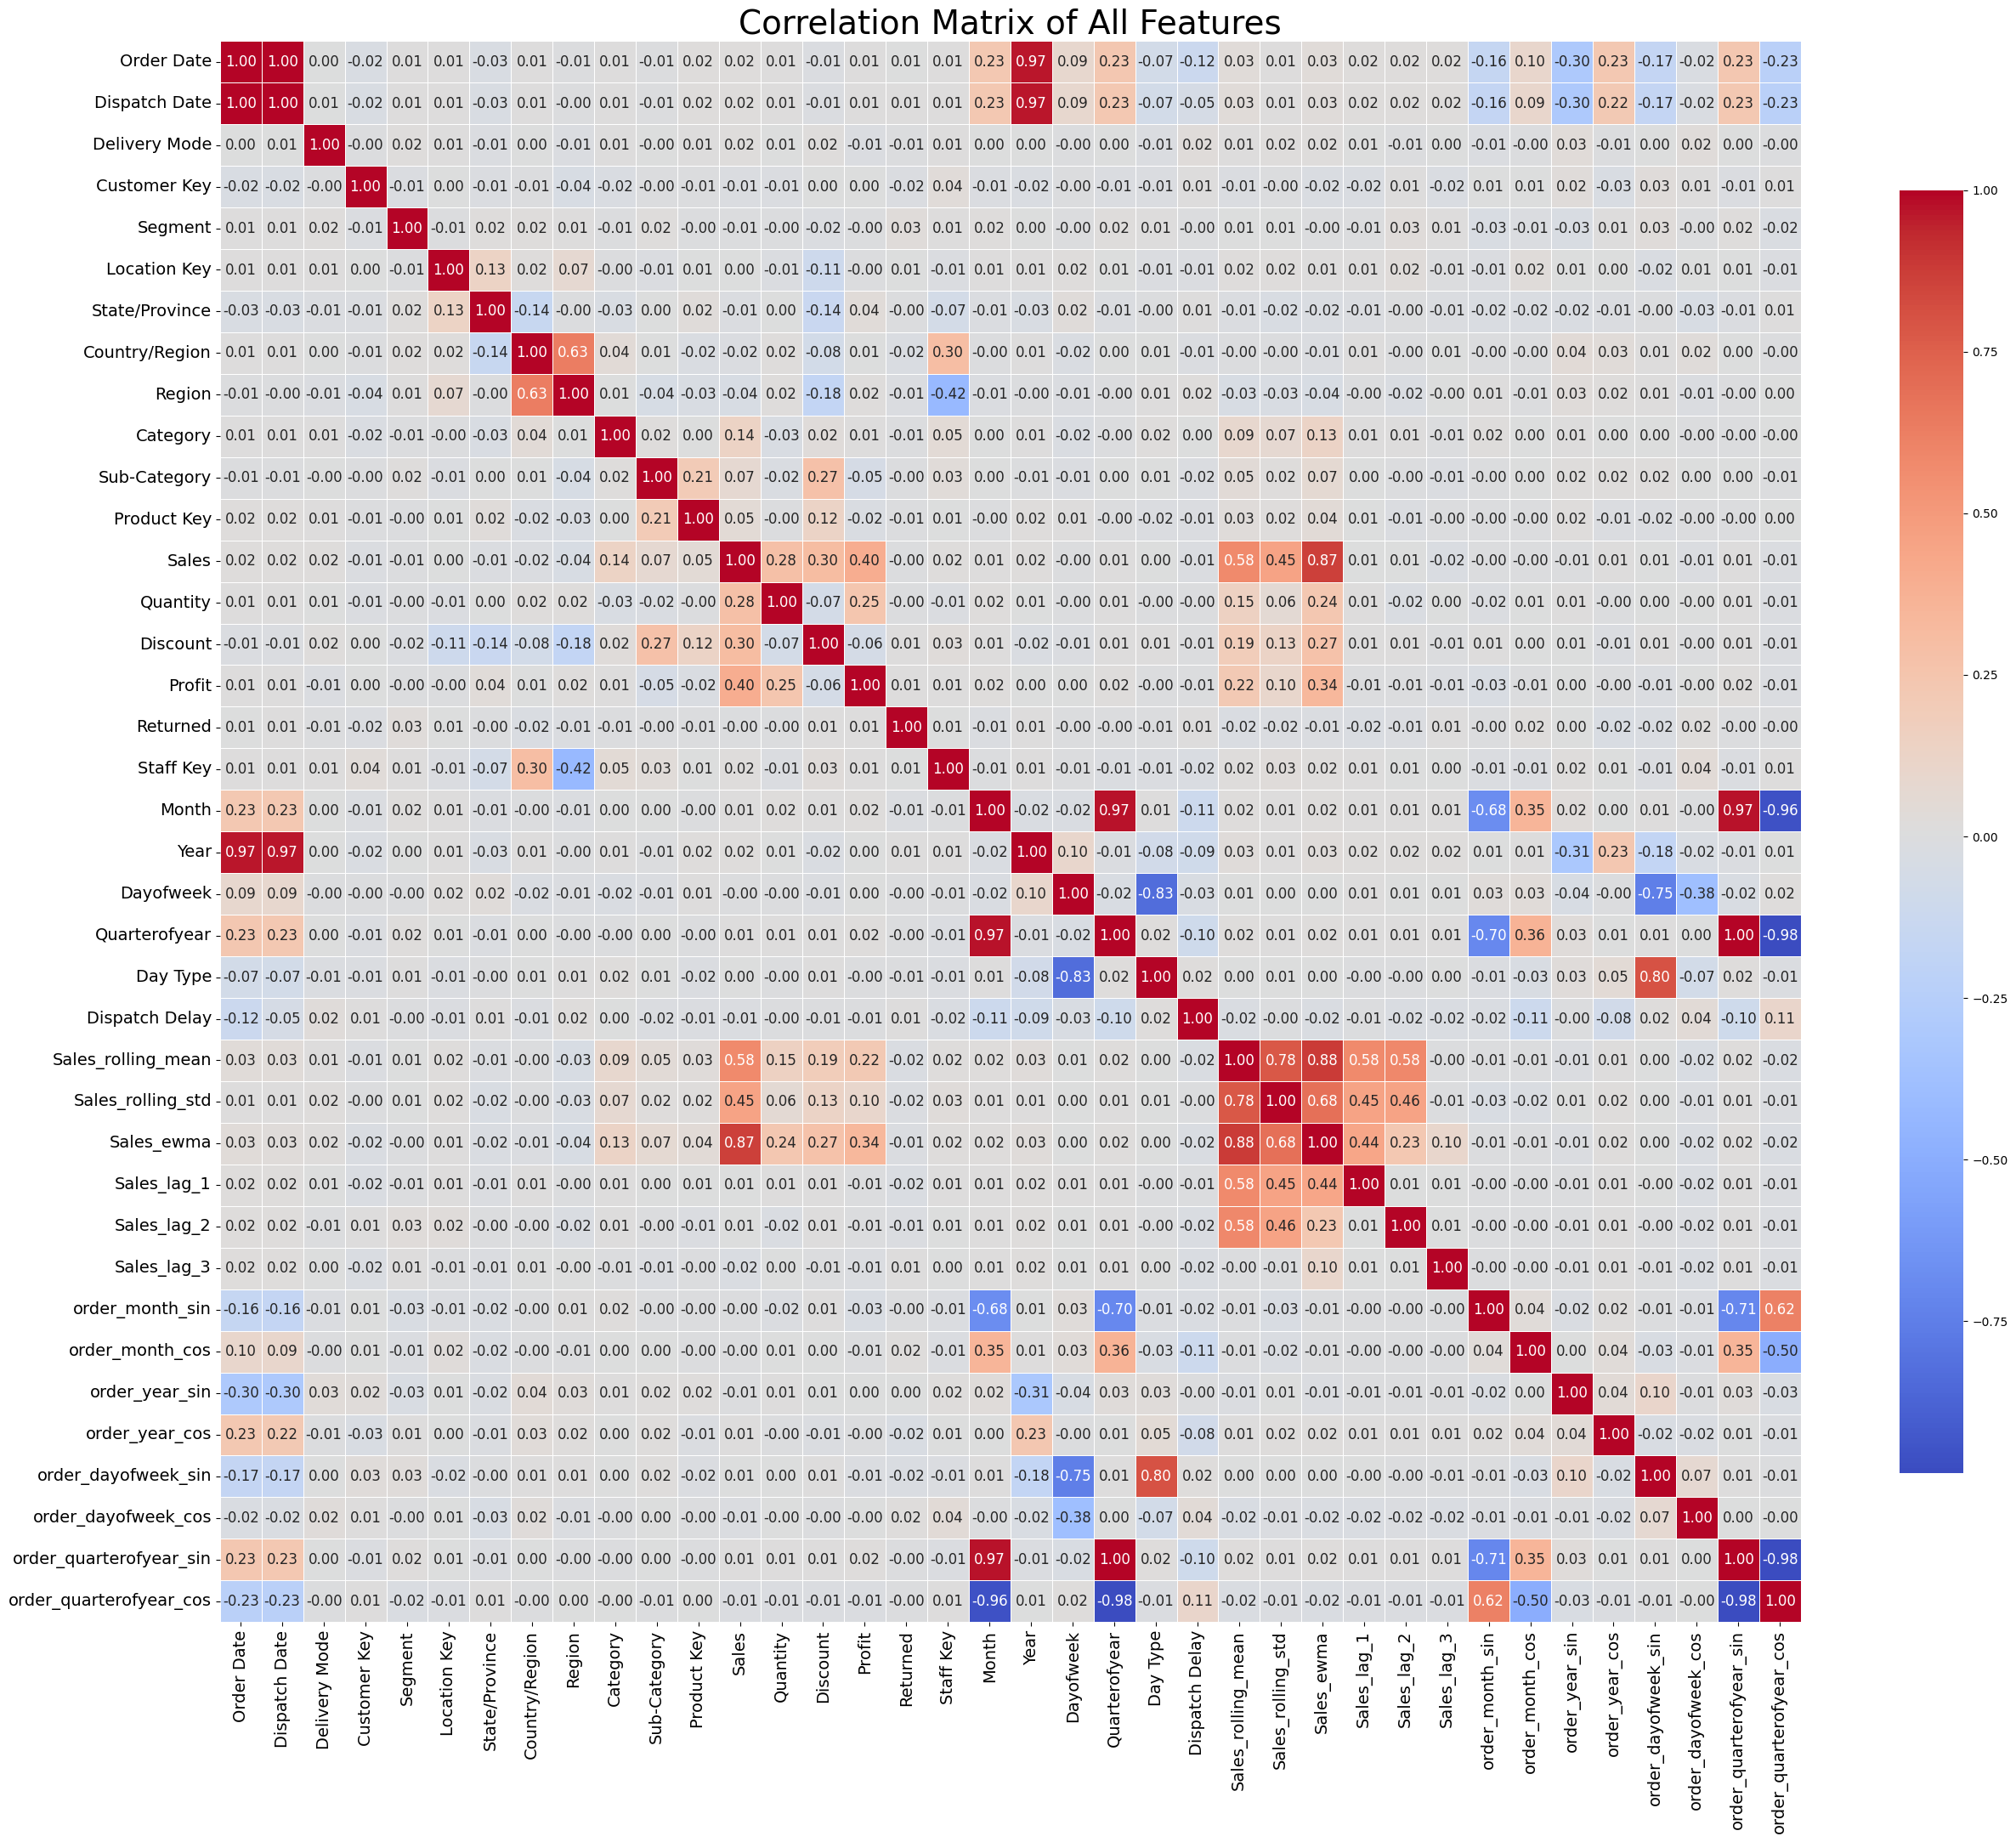

In [17]:
plt.figure(figsize=(30, 28))
sns.heatmap(prep_data.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5, annot_kws={"size": 12}, cbar_kws={"shrink": 0.7})
plt.title('Correlation Matrix of All Features', fontsize=28)
plt.tick_params(labelsize=14)
plt.show()

**Feature selection**

Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes the least important features based on the model's coefficients until the desired number of features is reached. It helps in identifying the most relevant features that contribute to the prediction of the target variable.

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Drop columns to avoid redundancy
prep_data = prep_data.drop(columns=['Order Date', 'Dispatch Date', 'Month', 'Year', 'Dayofweek', 'Quarterofyear'])

# Feature selection using RFE
X = prep_data.drop('Sales', axis=1)
y = prep_data['Sales']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=10)
fit = rfe.fit(X, y)

features = X.columns[fit.support_]

print("Selected Features:", features)

Selected Features: Index(['Discount', 'Profit', 'Sales_rolling_mean', 'Sales_rolling_std',
       'Sales_ewma', 'Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3',
       'order_quarterofyear_sin', 'order_quarterofyear_cos'],
      dtype='object')


**Visualize correlation between 'Sales' and selected features**

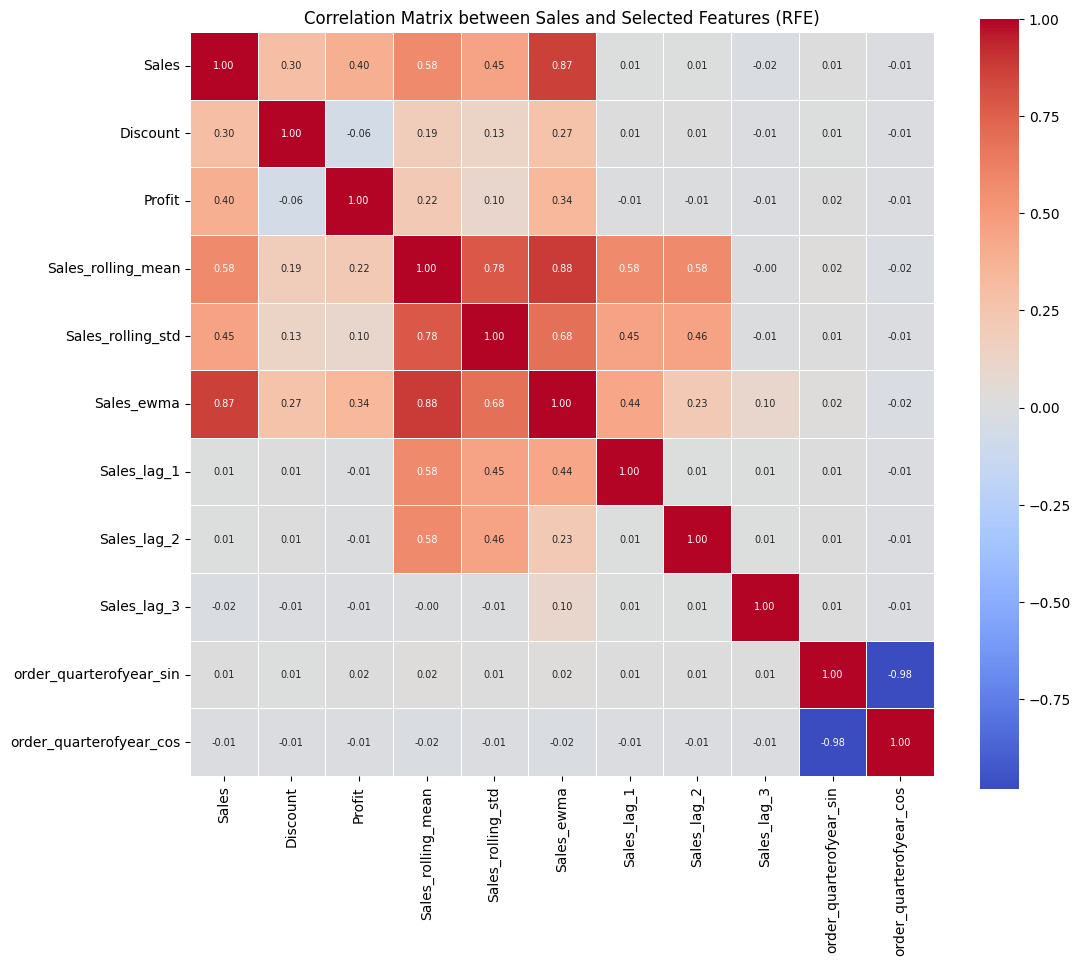

In [19]:
corr_mtrx = prep_data[['Sales'] + list(features)].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_mtrx, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5, annot_kws={"size": 7})
plt.title('Correlation Matrix between Sales and Selected Features (RFE)')
plt.show()

**Positive Correlations:**

1. *Sales_ewma (0.87):*

Exponentially Weighted Moving Average (EWMA) of Sales is highly positively correlated with Sales.

This indicates that the smoothed sales values (using EWMA) closely follow the actual sales values.

2. *Sales_rolling_mean (0.58):*

The rolling mean of Sales is moderately positively correlated with Sales.

This shows that the average sales over a rolling window also follow the actual sales values.

3. *Profit (0.40):*

Profit is moderately positively correlated with Sales.

This means that as sales increase, profit also tends to increase, which is expected in most business scenarios.

4. *Discount (0.30):*

Discount has a low positive correlation with Sales.

This suggests that higher discounts are somewhat associated with higher sales, possibly due to promotional activities.

**Negative Correlations:**

1. *order_quarterofyear_cos (-0.27):*

The cosine transformation of the order quarter of the year has a weak negative correlation with Sales.

This indicates a slight seasonal trend in sales across different quarters.

**Near Zero Correlations:**

1. *Sales_rolling_std (0.08):*

The rolling standard deviation of Sales has a very weak positive correlation with Sales.

This suggests that the variability in sales over a rolling window does not have a strong relationship with the actual sales values.

2. *Sales_lag_1 (0.12), Sales_lag_2 (0.10), Sales_lag_3 (0.10):*

The lagged sales variables (1, 2, and 3 periods) have very weak positive correlations with Sales.

This indicates that past sales values have a minimal impact on current sales values.

**Highly Negative Correlation:**

1. *order_quarterofyear_sin and order_quarterofyear_cos (-0.98):*

These two features have a strong negative correlation with each other, which is expected as they are sine and cosine transformations of the same variable.

**Visualize the distribution summary of all selected features**

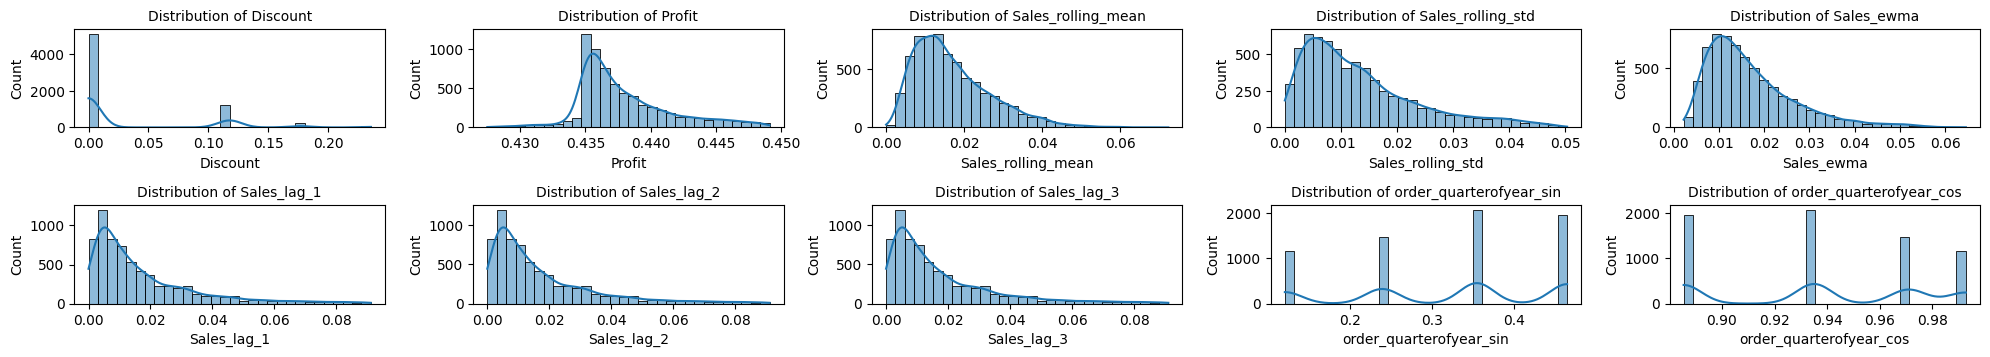

In [20]:
plt.figure(figsize=(20, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 5, i)
    sns.histplot(prep_data[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}', fontsize=10)
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.subplots_adjust(wspace=0.4, hspace=1.0)
plt.tight_layout()
plt.show()

**Scatter Plot of 'Sales' and all selected features**

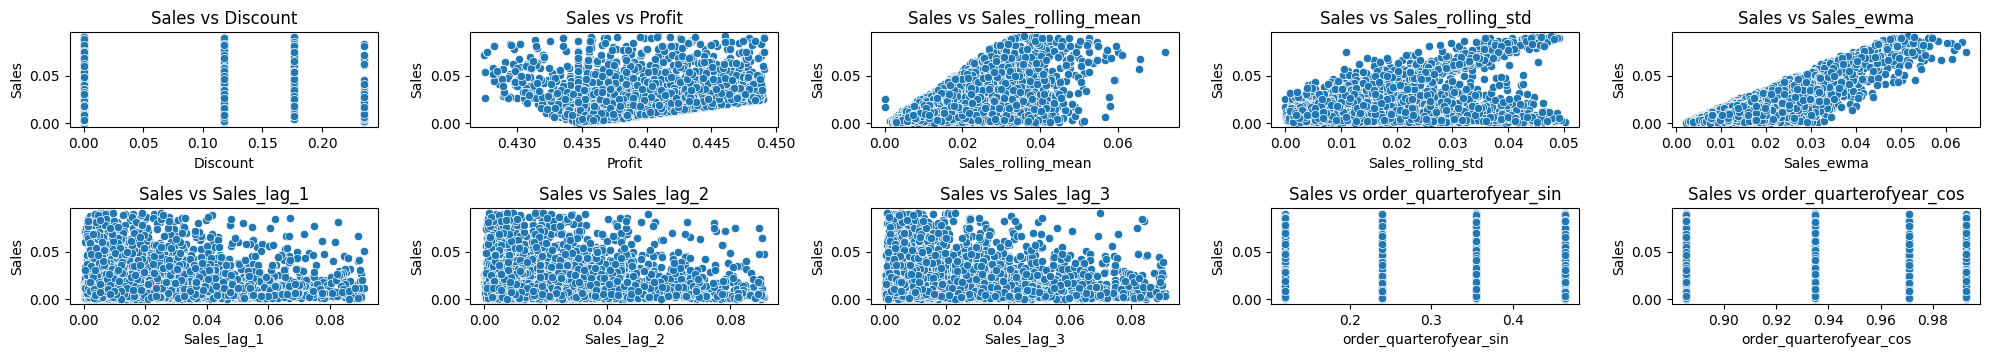

In [21]:
plt.figure(figsize=(20, 5))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 5, i)
    sns.scatterplot(x=prep_data[feature], y=prep_data['Sales'])
    plt.title(f'Sales vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Sales')
plt.tight_layout()
plt.show()

**Export the preprocessed dataset and calculate the percentage of cleaned dataset compared to original dataset**


In [22]:
# Dataset for visualization
col = ['Customer Key', 'Location Key', 'Product Key', 'order_month_sin', 'order_month_cos', 'order_year_sin', 'order_year_cos', 'order_dayofweek_sin', 'order_dayofweek_cos', 'order_quarterofyear_sin', 'order_quarterofyear_cos']
clean_data = pd.concat([data, prep_data[col]], axis=1)

# Dataset for modelling
prep_data = prep_data[features]
model_data = pd.concat([prep_data, data[['Sales', 'Order Date']]], axis=1)

# Export datasets
clean_data.to_csv("C:/Users/HS/Downloads/FYP_Datasets/Order.csv", index=False)
model_data.to_csv("C:/Users/HS/Downloads/FYP_Datasets/Scaled_Dataset.csv", index=False)
print(f"Datasets have been exported")

# Compare the percentage of cleaned dataset
original_count = df.shape[0]
cleaned_count = clean_data.shape[0]
percentage = (cleaned_count / original_count) * 100

print(f"Original dataset rows: {original_count}")
print(f"Cleaned dataset rows: {cleaned_count}")
print(f"Percentage of cleaned dataset: {percentage:.2f}%")

Datasets have been exported
Original dataset rows: 11588
Cleaned dataset rows: 6695
Percentage of cleaned dataset: 57.78%


The cleaning process reduced the dataset size from 11,588 rows to 6,695 rows, retaining approximately 57.78% of the original data. This indicates that a significant portion of the data was removed, likely due to the removal of outliers or other cleaning steps.